In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
import pandas as pd

# Update file paths as per your Google Drive location
customers_df = pd.read_csv('/content/drive/MyDrive/Customers.csv')
products_df = pd.read_csv('/content/drive/MyDrive/Products.csv')
transactions_df = pd.read_csv('/content/drive/MyDrive/Transactions.csv')

# Display the first few rows
print(customers_df.head())
print(products_df.head())
print(transactions_df.head())


  CustomerID        CustomerName         Region  SignupDate
0      C0001    Lawrence Carroll  South America  2022-07-10
1      C0002      Elizabeth Lutz           Asia  2022-02-13
2      C0003      Michael Rivera  South America  2024-03-07
3      C0004  Kathleen Rodriguez  South America  2022-10-09
4      C0005         Laura Weber           Asia  2022-08-15
  ProductID              ProductName     Category   Price
0      P001     ActiveWear Biography        Books  169.30
1      P002    ActiveWear Smartwatch  Electronics  346.30
2      P003  ComfortLiving Biography        Books   44.12
3      P004            BookWorld Rug   Home Decor   95.69
4      P005          TechPro T-Shirt     Clothing  429.31
  TransactionID CustomerID ProductID      TransactionDate  Quantity  \
0        T00001      C0199      P067  2024-08-25 12:38:23         1   
1        T00112      C0146      P067  2024-05-27 22:23:54         1   
2        T00166      C0127      P067  2024-04-25 07:38:55         1   
3       

In [5]:
# Data Inspection:- To check for missing values, data types, and duplicate records.
# Check for missing values
print("\nMissing Values in Customers Dataset:")
print(customers_df.isnull().sum())

print("\nMissing Values in Products Dataset:")
print(products_df.isnull().sum())

print("\nMissing Values in Transactions Dataset:")
print(transactions_df.isnull().sum())

# Check for duplicate records
print("\nDuplicate Records Count:")
print({
    'Customers': customers_df.duplicated().sum(),
    'Products': products_df.duplicated().sum(),
    'Transactions': transactions_df.duplicated().sum()
})

# Check data types
print("\nData Types in Each Dataset:")
print(customers_df.dtypes)
print(products_df.dtypes)
print(transactions_df.dtypes)




Missing Values in Customers Dataset:
CustomerID      0
CustomerName    0
Region          0
SignupDate      0
dtype: int64

Missing Values in Products Dataset:
ProductID      0
ProductName    0
Category       0
Price          0
dtype: int64

Missing Values in Transactions Dataset:
TransactionID      0
CustomerID         0
ProductID          0
TransactionDate    0
Quantity           0
TotalValue         0
Price              0
dtype: int64

Duplicate Records Count:
{'Customers': 0, 'Products': 0, 'Transactions': 0}

Data Types in Each Dataset:
CustomerID      object
CustomerName    object
Region          object
SignupDate      object
dtype: object
ProductID       object
ProductName     object
Category        object
Price          float64
dtype: object
TransactionID       object
CustomerID          object
ProductID           object
TransactionDate     object
Quantity             int64
TotalValue         float64
Price              float64
dtype: object


In [6]:
#Data Cleaning:-To clean the data by handling missing values, correcting data types, and removing duplicates if found.
# Convert date columns to datetime format
customers_df['SignupDate'] = pd.to_datetime(customers_df['SignupDate'])
transactions_df['TransactionDate'] = pd.to_datetime(transactions_df['TransactionDate'])

# Remove duplicates if any
customers_df.drop_duplicates(inplace=True)
products_df.drop_duplicates(inplace=True)
transactions_df.drop_duplicates(inplace=True)

# Verify changes
print("\nData Cleaned Successfully.")

#Converting date columns to datetime type for easier time-based analysis.
#Removing duplicate records to maintain data integrity.



Data Cleaned Successfully.


<ipython-input-8-5d4ce5a5054a>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Region', data=customers_df, palette='Set2')


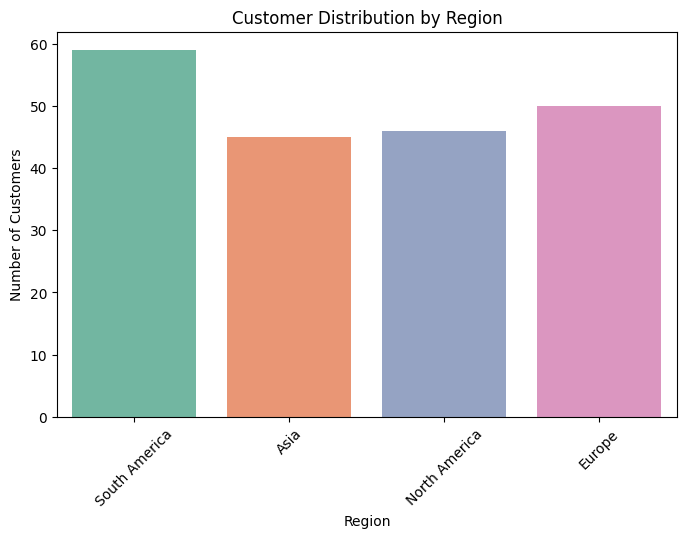

In [8]:
#Now :-> Exploratory Analysis and Visualization(EDA):
# To analyze key trends and visualize customer distribution, product sales, and transaction values.

# 1. Customer Distribution by Region
import matplotlib.pyplot as plt
import seaborn as sns

# Plot customer distribution by region
plt.figure(figsize=(8, 5))
sns.countplot(x='Region', data=customers_df, palette='Set2')
plt.title('Customer Distribution by Region')
plt.xlabel('Region')
plt.ylabel('Number of Customers')
plt.xticks(rotation=45)
plt.show()




**Insight:**
This chart helps identify the concentration of customers across different regions, which can help with regional marketing strategies.

<ipython-input-12-96b6e7c0c798>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Category', data=products_df, palette='pastel')


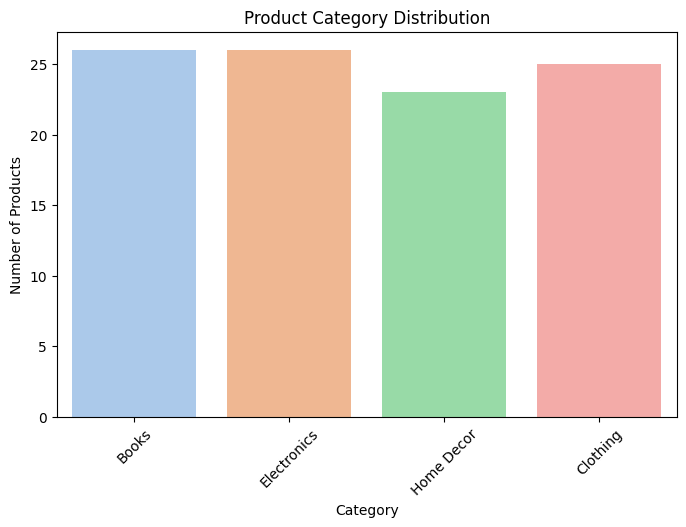

In [12]:
# 2. Product Category Distribution
# Plot product distribution by category
plt.figure(figsize=(8, 5))
sns.countplot(x='Category', data=products_df, palette='pastel')
plt.title('Product Category Distribution')
plt.xlabel('Category')
plt.ylabel('Number of Products')
plt.xticks(rotation=45)
plt.show()




**Insight:**
Understanding which product categories are most stocked can help align marketing and inventory management strategies.


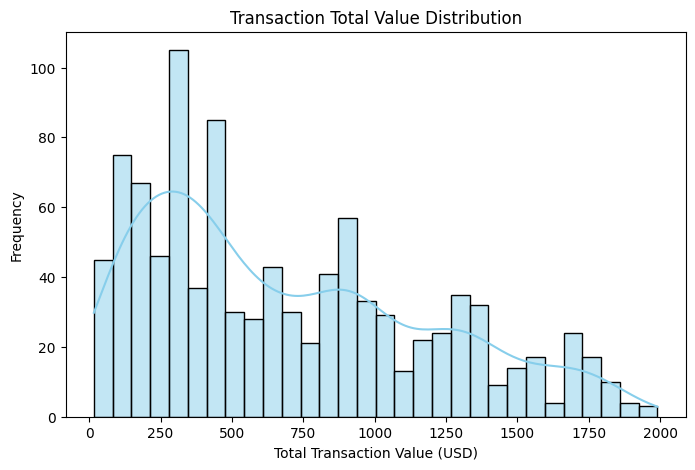

In [13]:
# 3. Transaction Value Distribution
# Distribution of total transaction value
plt.figure(figsize=(8, 5))
sns.histplot(transactions_df['TotalValue'], bins=30, kde=True, color='skyblue')
plt.title('Transaction Total Value Distribution')
plt.xlabel('Total Transaction Value (USD)')
plt.ylabel('Frequency')
plt.show()


**Insight:**
This visualization identifies the range of most common transaction values, helping businesses focus on customers with similar spending habits.


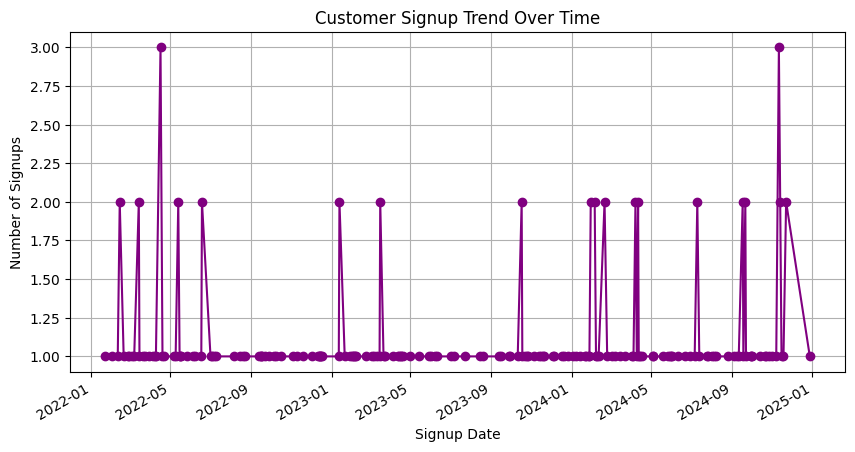

In [14]:
# 4. Customer Signup Trend Over Time
# Signup trend over time
customers_df['SignupDate'].value_counts().sort_index().plot(figsize=(10, 5), marker='o', color='purple')
plt.title('Customer Signup Trend Over Time')
plt.xlabel('Signup Date')
plt.ylabel('Number of Signups')
plt.grid(True)
plt.show()


**Insight:**
Identifying signup trends over time helps businesses optimize their marketing efforts during high-traffic periods.

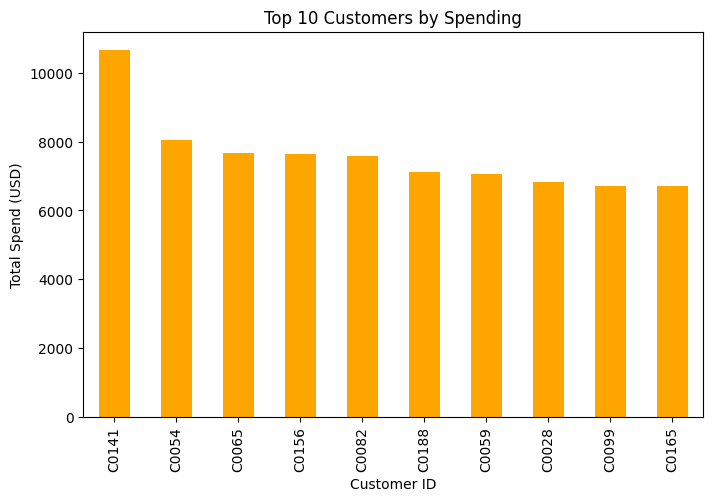

In [15]:
# 5. Top Customers by Spending
# Merge transactions with customer names for better visualization
top_customers = transactions_df.groupby('CustomerID')['TotalValue'].sum().sort_values(ascending=False).head(10)
top_customers.plot(kind='bar', figsize=(8, 5), color='orange')
plt.title('Top 10 Customers by Spending')
plt.xlabel('Customer ID')
plt.ylabel('Total Spend (USD)')
plt.show()


**Insight:**
This analysis highlights high-value customers, helping businesses focus on retention strategies for top spenders.
